In [1]:
import matplotlib.pyplot as plt          # used for plotting graphs
from sklearn import datasets, metrics, svm  # datasets: load data// svm: build Support Vector Machine models// metrics: evaluate performance
from sklearn.model_selection import train_test_split  # split data into training and testing sets

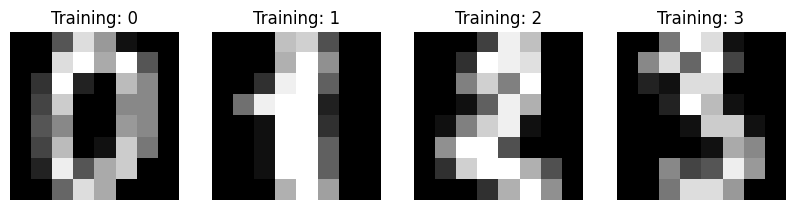

In [5]:
digits = datasets.load_digits()  # load handwritten digits dataset

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))  # create 4 subplots in one row
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.axis("off")  # hide axis ticks and borders
    ax.imshow(image, cmap="gray", interpolation="nearest")  # display digit image
    ax.set_title(f"Training: {label}")  # show corresponding digit label


In [4]:
# flatten the 8×8 images into 1D feature vectors
n_samples = len(digits.images) 
data = digits.images.reshape((n_samples, -1))

# create a Support Vector Machine classifier
clf = svm.SVC(gamma=0.001)

# split data into training and testing sets (50% each)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# train the classifier on the training data
clf.fit(X_train, y_train)

# predict digit labels for the test data
predicted = clf.predict(X_test)


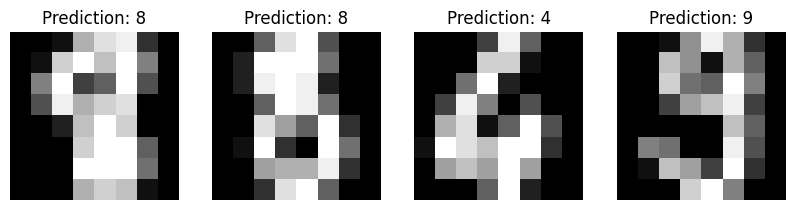

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))  # create 4 subplots in one row
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.axis("off")  # hide axis ticks and borders
    ax.imshow(image.reshape(8, 8), cmap="gray", interpolation="nearest")  # reshape and show image
    ax.set_title(f"Prediction: {prediction}")  # show predicted digit


In [7]:
# print precision, recall, f1-score and support for each digit class
print(metrics.classification_report(y_test, predicted))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


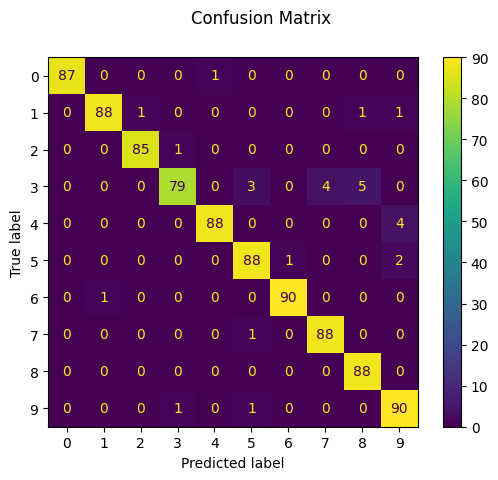

In [8]:
# display confusion matrix using true and predicted labels
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)

# add title to the confusion matrix figure
disp.figure_.suptitle("Confusion Matrix")

# print confusion matrix values as numbers
print(f"Confusion matrix:\n{disp.confusion_matrix}")
#print(disp.confusion_matrix) will work,just heading thakbe na

# show the plot
plt.show()

In [9]:
# lists to store reconstructed true and predicted labels
y_true, y_pred = [], []

cm = disp.confusion_matrix  # get confusion matrix values

# rebuild ground truth and predictions from confusion matrix counts
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true.extend([gt] * cm[gt][pred])   # add true labels
        y_pred.extend([pred] * cm[gt][pred]) # add predicted labels

# print classification report rebuilt from confusion matrix
print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)


Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


